# **Analyse de la relation dose-réponse des médicaments**
***
**Table des matières :**
* [1. Importation et aperçu des données](#1)
* [2. Analyse individuelle des médicaments](#2)
  * [2.1 Analyse du premier médicament](#21)
    * [2.1.1 Traitement des données](#211)
    * [2.1.2 Visualisation des données](#212)
    * [2.1.3 Application de la Régression Linéaire Simple](#213)
  * [2.2 Analyse du deuxième médicament](#22)
    * [2.2.1 Traitement des données](#221)
    * [2.2.2 Visualisation des données](#222)
    * [2.2.3 Application de la Régression Linéaire Simple](#223)
  * [2.3 Analyse du troisième médicament](#23)
    * [2.3.1 Traitement des données](#231)
    * [2.3.2 Visualisation des données](#232)
    * [2.3.3 Application de la Régression Linéaire Simple](#233)
  * [2.4 Analyse du quatrième médicament](#24)
    * [2.4.1 Visualisation des données](#241)
    * [2.4.2 Application de la Régression Logistique](#242)
***

**Équipe :** 
- Étienne ROSEAU
- Léo SABLONG
- Raphaël ROBERT
- Zhifeng LIANG
 

<a id='1'></a>
## **1. Importation et aperçu des données**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd 
df = pd.read_csv('/content/drive/My Drive/Relation dose-effet/hetic master data - Sheet3.csv')
df.head(10)

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df['response 4'].value_counts()

0    27
1     9
Name: response 4, dtype: int64

In [ ]:
df = df.sort_values('dose')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dose            36 non-null     int64  
 1   Patient number  36 non-null     int64  
 2   Response 1      36 non-null     float64
 3   response 2      36 non-null     float64
 4   Response 3      36 non-null     float64
 5   response 4      36 non-null     int64  
dtypes: float64(3), int64(3)
memory usage: 2.0 KB


In [ ]:
df.iloc[:, 2:].describe()

,Response 1,response 2,Response 3,response 4
count,36.000000,36.000000,36.000000,36.000000
mean,-0.554809,-0.498339,0.265675,0.250000
std,4.673776,4.667685,0.357837,0.439155
min,-2.944439,-2.933886,0.050000,0.000000
25%,-2.932170,-2.856847,0.050587,0.000000
50%,-2.707248,-2.644474,0.062755,0.000000
75%,-1.145060,-1.077824,0.267545,0.250000
max,13.413555,13.450094,0.999999,1.000000


<a id='2'></a>
## **2. Analyse individuelle des médicaments**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

<a id='21'></a>
### **2.1 Analyse du premier médicament**

<a id='211'></a>
#### 2.1.1 Traitement des données

- Détection des données aberrantes avec Z-score
  - Les 3 dernières données sont aberrantes
  - On exclure ces données

In [ ]:
df['Response 1'][stats.zscore(df['Response 1']) > 3]

34    13.413555
33    13.413555
35    13.413555
Name: Response 1, dtype: float64

In [ ]:
df_medicament_1 = df['Response 1'][stats.zscore(df['Response 1']) < 3]

<a id='212'></a>
#### 2.1.2 Visualisation des données


 Le coefficient de corrélation entre la dose et la réponse pour le première medicament est 1.0.



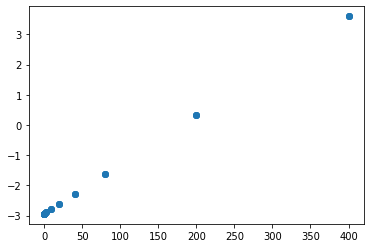

In [ ]:
x1 = np.array(df['dose'].iloc[:-3])
y1 = np.array(df_medicament_1)
print(f"\n Le coefficient de corrélation entre la dose et la réponse pour le première medicament est {np.corrcoef(x1, y1)[0][1]}.\n")
y1 = y1.reshape(-1,1)
x1 = x1.reshape(-1,1)

plt.scatter(x1, y1)
plt.show()

<a id='213'></a>
#### 2.1.3 Application de la Régression Linéaire Simple : $\hat{y} =  \hat{\beta}_{0} + \hat{\beta}_{1}x_{1}$

In [ ]:
linear_regressor_1 = LinearRegression()
linear_regressor_1.fit(x1, y1)
y1_pred = linear_regressor_1.predict(x1)
beta1_0 = linear_regressor_1.intercept_
beta1_1 = linear_regressor_1.coef_
print(beta1_0, beta1_1)

[-2.94443898] [[0.01635799]]


$\hat{y} =  - 2,944 + 0,016\times x_{1}$

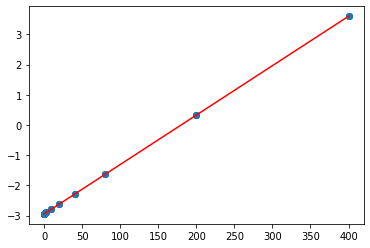

In [ ]:
plt.scatter(x1, y1)
plt.plot(x1, y1_pred, color='red')
plt.show()

<a id='22'></a>
### **2.2 Analyse du deuxième médicament**

<a id='221'></a>
#### 2.2.1 Traitement des données

- Détection des données aberrantes avec Z-score
  - Les 3 dernières données sont aberrantes
  - On exclure ces données

In [ ]:
df['response 2'][stats.zscore(df['response 2']) > 3]

34    13.441680
33    13.450094
35    13.441149
Name: response 2, dtype: float64

In [ ]:
df_medicament_2 = df['response 2'][stats.zscore(df['Response 1']) < 3]

<a id='222'></a>
#### 2.2.2 Visualisation des données


 Le coefficient de corrélation entre la dose et la réponse pour le deuxième medicament est 0.9999084628898042.



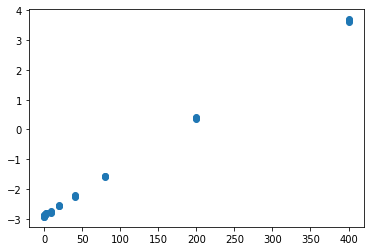

In [ ]:
x2 = np.array(df['dose'].iloc[:-3])
y2 = np.array(df_medicament_2)
print(f"\n Le coefficient de corrélation entre la dose et la réponse pour le deuxième medicament est {np.corrcoef(x2, y2)[0][1]}.\n")
y2 = y2.reshape(-1,1)
x2 = x2.reshape(-1,1)
plt.scatter(x2, y2)
plt.show()

<a id='223'></a>
#### 2.2.3 Application de la Régression Linéaire Simple : $\hat{y} =  \hat{\beta}_{0} + \hat{\beta}_{1}x_{1}$

In [ ]:
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(x2, y2)
y2_pred = linear_regressor_2.predict(x2)
beta2_0 = linear_regressor_2.intercept_
beta2_1 = linear_regressor_2.coef_
print(beta2_0, beta2_1)

[-2.88711656] [[0.01637969]]


$\hat{y} =  - 2,887 + 0,016\times x_{1}$

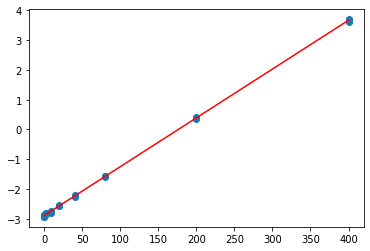

In [ ]:
plt.scatter(x2, y2)
plt.plot(x2, y2_pred, color='red')
plt.show()

<a id='23'></a>
### **2.3 Analyse du troisième médicament**

<a id='231'></a>
#### 2.3.1 Traitement des données

- Détection des données aberrantes avec Z-score
  - Aucune donnée est aberrante

In [ ]:
df['Response 3'][stats.zscore(df['Response 3']) > 3]

Series([], Name: Response 3, dtype: float64)

<a id='232'></a>
#### 2.3.2 Visualisation des données


 Le coefficient de corrélation entre la dose et la réponse pour le troisième medicament est 0.8875211112473089.



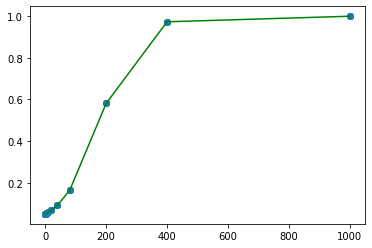

In [ ]:
x3 = np.array(df['dose'])
y3 = np.array(df['Response 3'])
print(f"\n Le coefficient de corrélation entre la dose et la réponse pour le troisième medicament est {np.corrcoef(x3, y3)[0][1]}.\n")
y3 = y3.reshape(-1,1)
x3 = x3.reshape(-1,1)
plt.scatter(x3, y3)
plt.plot(x3, y3, color='g')
plt.show()

<a id='233'></a>
#### 2.3.3 Application de la Régression Logistique

In [ ]:
linear_regressor_3 = LinearRegression()
linear_regressor_3.fit(x3, y3)
y3_pred = linear_regressor_3.predict(x3)
beta3_0 = linear_regressor_3.intercept_
beta3_1 = linear_regressor_3.coef_
print(beta3_0, beta3_1)

[0.10329691] [[0.00111154]]


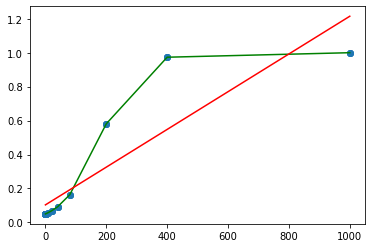

In [ ]:
plt.scatter(x3, y3)
plt.plot(x3, y3, color='g')
plt.plot(x3, y3_pred, color='r')
plt.show()

<a id='24'></a>
### **2.4 Analyse du quatrième médicament**

<a id='241'></a>
#### 2.4.1 Visualisation des données


 Le coefficient de corrélation entre la dose et la réponse pour le quatrième medicament est 0.7662906893522443.



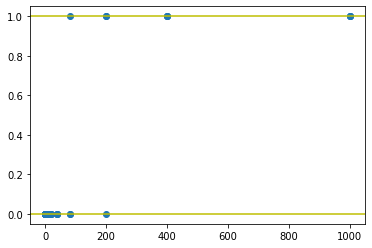

In [ ]:
x4 = np.array(df['dose'])
y4 = np.array(df['response 4'])
print(f"\n Le coefficient de corrélation entre la dose et la réponse pour le quatrième medicament est {np.corrcoef(x4, y4)[0][1]}.\n")
x4 = x4.reshape(-1,1)
plt.scatter(x4, y4)
plt.axhline(y=0, color='y')
plt.axhline(y=1, color='y')
plt.show()

In [ ]:
x4.shape, y4.shape

((36, 1), (36,))

<a id='242'></a>
#### 2.4.2 Application de la Régression Logistique

In [ ]:
logistic_regressor = LogisticRegression()
logistic_regressor.fit(x4, y4)
y4_pred = logistic_regressor.predict(x4)

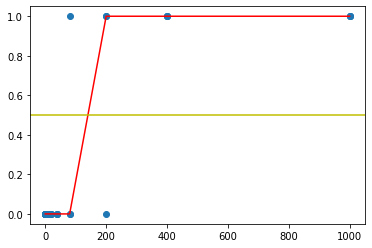

In [ ]:
plt.scatter(x4, y4)
plt.plot(x4, y4_pred, color='red')
plt.axhline(y=0.5, color='y')
plt.show()